# Example 1

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

In [3]:
df = pd.DataFrame(data)

In [4]:
df = df[['ID', 'Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]]

In [5]:
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [24]:
# Convertis les valeurs du DataFrame en booléens
bool_df = df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer']].astype(bool)

# Applique l'algorithme Apriori sur le DataFrame converti
frequent_itemsets = apriori(bool_df, min_support=0.50, use_colnames=True)


In [25]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Onion, Potato)"
5,0.500000,"(Onion, Burger)"
6,0.666667,"(Burger, Potato)"
7,0.500000,"(Milk, Potato)"
8,0.500000,"(Onion, Burger, Potato)"


In [26]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [27]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf,0.500000
1,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667,1.000000
2,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
3,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf,0.500000
5,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667,1.000000
6,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,0.083333,inf,0.333333
7,"(Onion, Potato)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
8,"(Burger, Potato)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
9,(Onion),"(Burger, Potato)",0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333


In [28]:
rules [ (rules['lift'] >1.125)  & (rules['confidence']> 0.8)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf,0.500000
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf,0.500000
6,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,0.083333,inf,0.333333


In [29]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

In [30]:
retail = pd.DataFrame(retail_shopping_basket)

In [31]:
retail = retail[['ID', 'Basket']]

In [32]:
pd.options.display.max_colwidth=100

In [33]:
retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


In [34]:
#from sklearn.preprocessing import MultiLabelBinarizer
#mlb = MultiLabelBinarizer()
#pd.DataFrame(mlb.fit_transform(retail.Basket), columns=mlb.classes_)

In [36]:
retail = retail.drop('Basket', axis=1).join(retail.Basket.str.join(',').str.get_dummies(','))

In [37]:
retail

,ID,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,2,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,5,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,6,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [40]:
# Assure-toi que toutes les colonnes sont de type booléen
retail_bool = retail.drop('ID', axis=1).astype(bool)

# Applique ensuite l'algorithme Apriori
frequent_itemsets_2 = apriori(retail_bool, use_colnames=True)


In [41]:
frequent_itemsets_2

,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Beer, Chips)"
5,0.500000,"(Beer, Diaper)"


In [42]:
association_rules(frequent_itemsets_2, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333,0.333333
1,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333,0.333333
2,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,0.166667,2.000000,1.000000
3,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,0.166667,inf,0.666667


In [43]:
association_rules(frequent_itemsets_2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,0.166667,inf,0.666667


We might want to take a look at the data and look at the stat first:

In [51]:
movies = pd.read_csv(r'.\data\data workshop2\movies.csv')

In [52]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [54]:
movies_ohe = movies.drop('genres', axis=1).join(movies.genres.str.get_dummies())

In [55]:
pd.options.display.max_columns=100

In [56]:
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
stat1 = movies_ohe.drop(['title', 'movieId'], axis=1).apply(lambda x: pd.Series(x).value_counts())


In [ ]:
stat1 = stat1.transpose().drop(0, axis=1).sort_values(by=1, ascending=False).rename(columns={1: 'No. of movies'})

In [64]:
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})

In [66]:
stat2 = stat2[stat2['genre_count'] == 1].drop('movieId', axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)

In [67]:
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)

In [68]:
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

In [69]:
stat

,No. of movies,title,No. of movies with only 1 genre
Drama,4365,"Nixon (1995)Othello (1995)Dangerous Minds (1995)Cry, the Beloved Country (1995)Restoration (1995...",1170
Comedy,3315,Father of the Bride Part II (1995)Four Rooms (1995)Ace Ventura: When Nature Calls (1995)Bio-Dome...,809
Thriller,1729,"Jade (1995)Safe (1995)Tie That Binds, The (1995)Hideaway (1995)Red Rock West (1992)Blink (1994)F...",74
Action,1545,"Sudden Death (1995)Fair Game (1995)Under Siege 2: Dark Territory (1995)Hunted, The (1995)Bloodsp...",39
Romance,1545,Jack and Sarah (1995)Hustler White (1996)Kama Sutra: A Tale of Love (1996)Love and Other Catastr...,14
Adventure,1117,"Mark of Zorro, The (1940)Beyond the Poseidon Adventure (1979)Brenda Starr (1989)Snows of Kiliman...",11
Crime,1100,Coup de torchon (Clean Slate) (1981)Gridlock'd (1997)Keys to Tulsa (1997)Clay Pigeons (1998)Gene...,11
Horror,877,Lord of Illusions (1995)Castle Freak (1995)Cemetery Man (Dellamorte Dellamore) (1994)Eyes Withou...,183
Sci-Fi,792,2010: The Year We Make Contact (1984)Meteor (1979)It Came from Outer Space (1953)Mission to Mars...,17
Fantasy,654,"Andalusian Dog, An (Chien andalou, Un) (1929)Eaux d'artifice (1953)Inauguration of the Pleasure ...",3


Text(0.5, 1.0, 'distribution of number of genres')

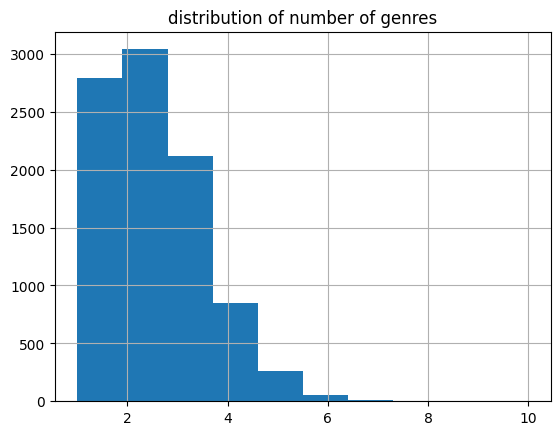

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [71]:
movies_ohe.set_index(['movieId','title'],inplace=True)

In [74]:
# Convertir toutes les valeurs du DataFrame en booléens
movies_ohe_bool = movies_ohe.astype(bool)

# Appliquer l'algorithme Apriori au DataFrame converti
frequent_itemsets_movies = apriori(movies_ohe_bool, use_colnames=True, min_support=0.025)


In [75]:
frequent_itemsets_movies

,support,itemsets
0,0.169315,(Action)
1,0.122411,(Adventure)
2,0.048986,(Animation)
3,0.063890,(Children)
4,0.363288,(Comedy)
5,0.120548,(Crime)
6,0.054247,(Documentary)
7,0.478356,(Drama)
8,0.071671,(Fantasy)
9,0.096110,(Horror)


In [76]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)

In [77]:
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,0.037575,1.338475,0.775868
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111,0.734401
2,(Action),(Crime),0.169315,0.120548,0.038247,0.225890,1.873860,0.017836,1.136081,0.561395
3,(Crime),(Action),0.120548,0.169315,0.038247,0.317273,1.873860,0.017836,1.216716,0.530264
4,(Action),(Sci-Fi),0.169315,0.086795,0.040986,0.242071,2.789015,0.026291,1.204870,0.772195
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,0.026291,1.573929,0.702416
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,0.030822,1.289654,0.589863
7,(Thriller),(Action),0.189479,0.169315,0.062904,0.331984,1.960746,0.030822,1.243510,0.604537
8,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,0.021439,1.619096,0.782722
9,(Adventure),(Children),0.122411,0.063890,0.029260,0.239033,3.741299,0.021439,1.230158,0.834916


In [78]:
rules_movies[(rules_movies.conviction>1.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,0.037575,1.338475,0.775868
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111,0.734401
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,0.026291,1.573929,0.702416
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,0.030822,1.289654,0.589863
8,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,0.021439,1.619096,0.782722
10,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,0.021912,1.534608,0.769213
13,(Sci-Fi),(Adventure),0.086795,0.122411,0.027726,0.319444,2.609607,0.017101,1.289519,0.675424
14,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,0.023939,2.092205,0.929930
15,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,0.023939,1.650122,0.944736
17,(Children),(Comedy),0.063890,0.363288,0.032877,0.514580,1.416453,0.009666,1.311672,0.314077


In [79]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,0.023939,2.092205,0.929930
15,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,0.023939,1.650122,0.944736
8,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,0.021439,1.619096,0.782722
10,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,0.021912,1.534608,0.769213
29,(Mystery),(Thriller),0.059507,0.189479,0.036055,0.605893,3.197672,0.024779,2.056601,0.730758
1,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111,0.734401
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,0.026291,1.573929,0.702416
21,(Crime),(Thriller),0.120548,0.189479,0.057863,0.480000,2.533256,0.035022,1.558693,0.688214
35,"(Drama, Crime)",(Thriller),0.067616,0.189479,0.032000,0.473258,2.497673,0.019188,1.538742,0.643112
25,(War),(Drama),0.040219,0.478356,0.031014,0.771117,1.612015,0.011775,2.279087,0.395568


In [80]:
pd.options.display.max_rows=50

In [81]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
56,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
98,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
114,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
...,...,...,...
8871,132046,Tomorrowland (2015),Action|Adventure|Children|Mystery|Sci-Fi
8916,135264,Zenon: Girl of the 21st Century (1999),Adventure|Children|Comedy
8917,135266,Zenon: The Zequel (2001),Adventure|Children|Comedy|Sci-Fi
8918,135268,Zenon: Z3 (2004),Adventure|Children|Comedy
